# Kalorimetrie Küchentischversuch - Wärmekapazität eines Behälters

Author: Jannik Hoffmann

Datum: 19.11.2023

Gruppe: 09

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu diesem Versuch.

Ist es möglich mit einem einfachen Versuchsaufbau die Wärmekapazität eine Behälters relativ genau zu bestimmen?

## Versuchsaufbau und Durchführung

Um die Wärmekapazität eines Papierbechers zu bestimmen nutzen wir 2 Papierbecher, einer wurde dabei mit 200ml warmen Wasser gefüllt und der andere mit 200ml kaltem Wasser, beim Versuch selbst wurden die Temperaturen der einzelnen Becher gemessen während das wärme in das kalte Wasser eingerührt wurde.

<img src="figures/Versuchs_Wärmekapazität.jpg" width="800">

## Versuchsauswertung

In [9]:
import numpy as np
from matplotlib import pyplot as plt
from functions import m_json

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Wärmekapazität eines Behälters

Hinweis: Nutzen Sie die Funktionen *get_ids_from_setup* und *get_json_entry* um auf Metadaten zuzugreifen. 

Sie sollten Ihr Programm zwischen TODO und DONE implementieren, und versuchen die Anweisung zu verfolgen. Das ist aber nicht erforderlich.


#### (i) Messdaten einlesen

Messdaten werden in das Notebook eingelesen.

In [10]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.
import h5py as h5
datapath = "data/heat_capacity/heat_capacity.h5"
# DONE #

In [11]:
# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.
with h5.File(datapath) as l:
    h5_datei = l["RawData"]
    time_1 = l["RawData/1ee86e00-a169-664b-aa57-003f4a6a3b13/timestamp"]
    temp_1 = l["RawData/1ee86e00-a169-664b-aa57-003f4a6a3b13/temperature"]
    time_2 = l["RawData/1ee86e03-92f3-6747-9374-16582cf878a4/timestamp"]
    temp_2 = l["RawData/1ee86e03-92f3-6747-9374-16582cf878a4/temperature"]
    time_1_Array=np.array(time_1)                                               #Zeit der Messung von Sensor 1 in ein Array schreiben
    temp_1_Array=np.array(temp_1)                                               #Temperaturwerte von Sensor 1 in ein Array schreiben
    time_2_Array=np.array(time_2)                                               #Zeit der Messung von Sensor 2 in ein Array schreiben
    temp_2_Array=np.array(temp_2)                                               #Temperaturwerte von Sensor 2 in ein Array schreiben
# DONE #

#### (ii) Daten ploten

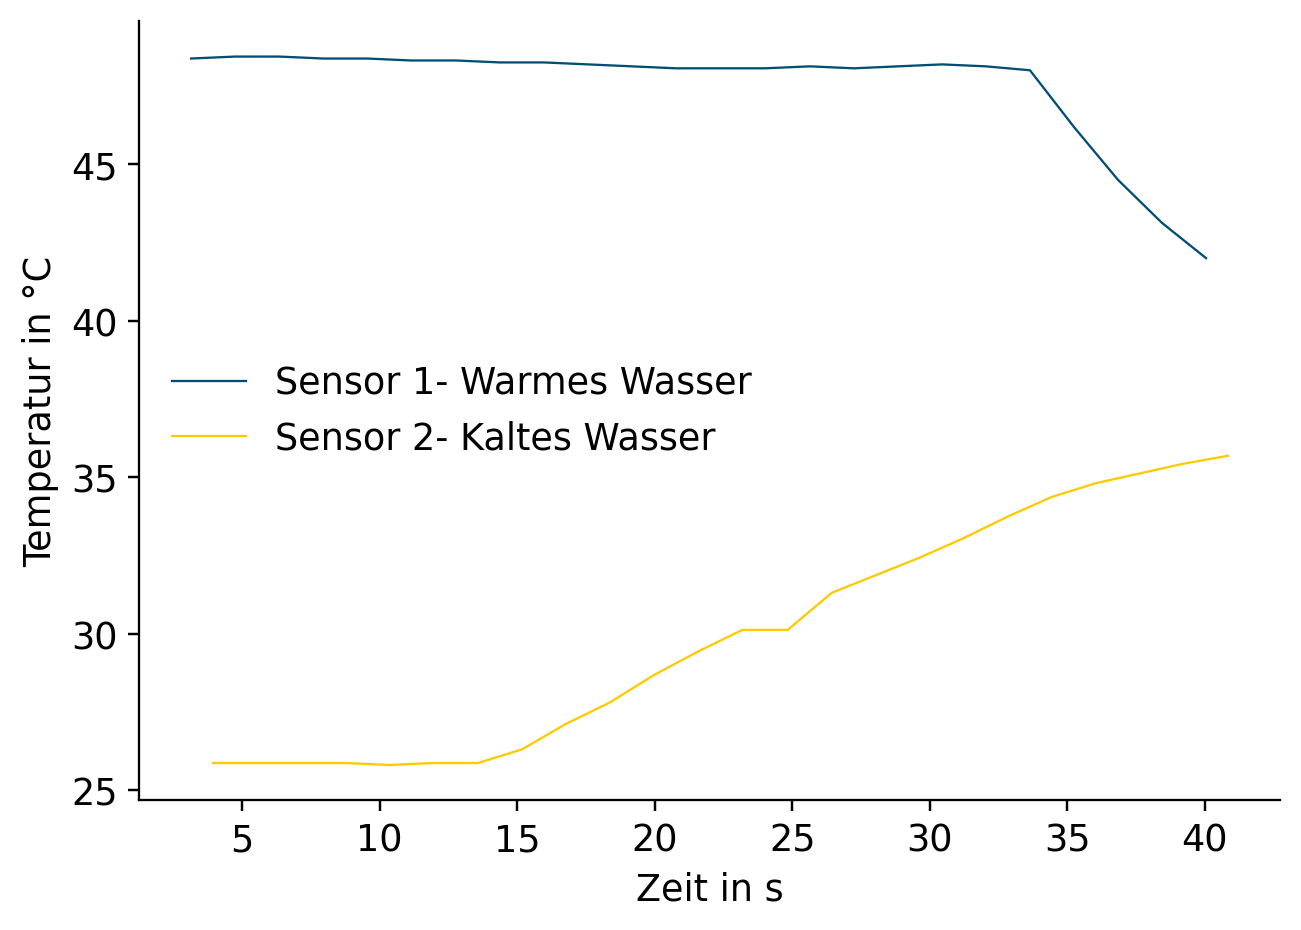

In [12]:
# TODO: Use the temperature and time data for plotting
import matplotlib.pyplot as plt 
import numpy as np

plt.plot(time_1_Array, temp_1_Array, label = 'Sensor 1- Warmes Wasser')       #Beide Arrays der Werte  von Sensor 1 plotten
plt.plot(time_2_Array, temp_2_Array, label = 'Sensor 2- Kaltes Wasser')       #Beide Arrays der Werte  von Sensor 1 plotten


plt.xlabel('Zeit in s')                                                       #x-Achse beschriften
plt.ylabel('Temperatur in °C')                                                #y-Achse beschriften
plt.legend()                                                                  #Legende anzeigen lassen
plt.show()
# DONE #

#### (iii) Metadaten auslesen

Die notwendigen Metadaten für die Berechnung der Wärmekapazität wird ausgelesen.

In [5]:
# Heat capacity of Water
water_heat_capa = 4.18

# TODO: Read mass from the metadata of the experiment.
from functions import m_json
folder_path = "/home/pi/Documents/Gitlab_Repository/calorimetry_home/data/heat_capacity"         #Ordner in dem alle Versuchsergebnisse abgelegt wurden
uuid = '1ee86e39-3220-6dcf-803d-41c7da9cb266'                                                    #uuid6 der json Datei der Probe
json_path = (["probe", "masse_heißes_wasser"])
masse_heißes_wasser = m_json.get_json_entry(folder_path, uuid, json_path)                        #masse des heißen Wassers aus Datei herauslesen
m_add = masse_heißes_wasser
json_path = (["probe", "masse_kaltes_wasser"])
masse_kaltes_wasser = m_json.get_json_entry(folder_path, uuid, json_path)                        #masse des kalten Wassers aus Datei herauslesen
m_cup = masse_kaltes_wasser
m_add_kg = int (m_add) * 0.001                                                                   #masse des heißen Wassers in kg speichern
m_cup_kg = int (m_cup) * 0.001                                                                   #masse des kalten Wassers in kg speichern

# DONE #

#### (iV) Anfangs- und Endwert der Temperatur

In [6]:
# TODO: Calculation of temperature data necessary to determine the specific heat capacity
T_1 = temp_2_Array[6]                                                                           # den 6-ten Temperatureintrag des Sensors 2 auslesen
T_2 = temp_1_Array[6]                                                                           # den 6-ten Temperatureintrag des Sensors 1 auslesen
T_M = temp_2_Array[23]                                                                          # den letzten Temperatureintrag des Sensors 2 auslesen = mittlere Temperatur des Behälters nach dem Versuch. Warum ist bei 'Diskussion' erklärt worden
# DONE #

#### (V) Wärmekapazität bestimmen
$$
C = \frac{m_{add}c_{w}(T_2-T_M)}{T_M - T_1} - m_{cup}c_{w}
$$
Dabei ist $m_{add}$ die Masse vom hinzugefügten Wasser, $T_2$ ist seine Temperatur. Die Masse vom Wasser im Behälter ist $m_{cup}$ und seine Temperatur ist $T_1$. Die Mischungstemperatur ist $T_M$. Die spezifische Wärmekapazität von Wasser ist $c_w$.

In [7]:
# TODO: Calculate heat capacity of the calorimeter
C_Becher = ((m_add_kg*water_heat_capa*(T_2-T_M))/(T_M-T_1))-(m_cup_kg*water_heat_capa)        #Wärmekapazität des Bechers ausrechnen indem die Formel implementiert wird
# DONE #

#### (Vi) Ergebnis

In [8]:
# TODO: Print result
print(C_Becher, "J/kg*K")                                                                     #Wärmekapazität des Bechers mit Einheit ausgeben lassen
# DONE #

0.23961783439490436 J/kg*K


## Diskussion

Analysieren Sie Ihre Ergebnisse aus wissenschaflticher Sicht. Berücksichtigen Sie dabei Ihre oben genannte Forschungsfrage.

Das Ergebnis ist meiner Meinung nach nur aussagekräftig wenn der Versuch nach einem bestimmen Ablauf ausgeführt wird. Bei meiner Versuchsdurchführung habe ich den Sensor aus dem heißen Wasser zu spät in den Behälter geschüttet. Daher ist die Mischungstemperatur nicht ganz richtig, die Zeit in der beide im Mischungsbehälter verweilen müsste länger gewählt werden. Im Graph wäre dies dann auch besser zu erkennen da dann die beiden Graphen am Ende auf gleicher Temperatur verweilen würden. Um meinen Fehler in der Messung auszugleichen habe ich als mittlere Temperatur den letzten Temperaturwert aus dem kalten Behälter angenommen.

## Fazit
Ziehe Sie ein persönliches Fazit zum Versuch.

In [ ]:
Ich fande den Versuch durchaus sehr interessant, das schreiben der benötigten Funktionen gestaltete sich jedoch als sehr kompliziert.